In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch import nn

In [9]:
iris = load_iris()

X = iris.data
y = iris.target

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [11]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [157]:
class LSTM(nn.Module):
    def __init__(self ,input_size, hidden_size, output_size):
        super(LSTM,self).__init__()
        self.cell = nn.Linear(5,4)
        self.ver = nn.Linear(5,4)
        self.hor = nn.Linear(5,4)
        self.hor_t = nn.Linear(5,4)
        
        self.hidden_size = hidden_size
        
        
    def forward(self,x,hidden_state,cell_state):
        
        comb = torch.cat((x.reshape(1,1),hidden_state),1)
        
        cell_state_t = torch.sigmoid(self.ver(comb))
        
        i_t = torch.sigmoid(self.hor(comb))
        c_t_hat = torch.tanh(self.hor_t(comb))
    
        c_t = cell_state_t * cell_state + i_t * c_t_hat
           
        o_t = i_t
        h_t = o_t * torch.tanh(c_t)
        
        return h_t,c_t,h_t
    
    
    # find a better way yto do this
    def init_state_t(self):
        #return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))
        return torch.zeros(1, self.hidden_size)
    
    def init_cell_t(self):
        #return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))
        return torch.zeros(1, self.hidden_size)
        
    


In [158]:
model = LSTM(1,4,3)


In [159]:
output = model(torch.tensor([X_train[0][0]]).float() ,torch.rand(1,4),torch.rand(1,4))

In [164]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [180]:

loss_ = []

for i in range(10): #epoch
    
    for j in range(len(y_train)):
        
        X = X_train[j]
        y = y_train[j].reshape(1)
        
        hidden_state = model.init_state_t()
        cell_state = model.init_cell_t()
        
        for s in X: 
            output,cell_state,hidden_state = model(torch.tensor([s]).float(),hidden_state,cell_state)
            
        loss = criterion(output,y)
        
        if j%10 == 0:
            print(loss)
            loss_.append(loss.item())
        

        #print("Training epoch %d loss %d",(i,loss.item()))
        
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        

tensor(0.8710, grad_fn=<NllLossBackward>)
tensor(0.6512, grad_fn=<NllLossBackward>)
tensor(0.6509, grad_fn=<NllLossBackward>)
tensor(0.6809, grad_fn=<NllLossBackward>)
tensor(1.5058, grad_fn=<NllLossBackward>)
tensor(0.6578, grad_fn=<NllLossBackward>)
tensor(0.6107, grad_fn=<NllLossBackward>)
tensor(1.2703, grad_fn=<NllLossBackward>)
tensor(0.8518, grad_fn=<NllLossBackward>)
tensor(0.7150, grad_fn=<NllLossBackward>)
tensor(0.6925, grad_fn=<NllLossBackward>)
tensor(0.9163, grad_fn=<NllLossBackward>)
tensor(0.8563, grad_fn=<NllLossBackward>)
tensor(0.6409, grad_fn=<NllLossBackward>)
tensor(0.6398, grad_fn=<NllLossBackward>)
tensor(0.6711, grad_fn=<NllLossBackward>)
tensor(1.5109, grad_fn=<NllLossBackward>)
tensor(0.6478, grad_fn=<NllLossBackward>)
tensor(0.5993, grad_fn=<NllLossBackward>)
tensor(1.2645, grad_fn=<NllLossBackward>)
tensor(0.8390, grad_fn=<NllLossBackward>)
tensor(0.7080, grad_fn=<NllLossBackward>)
tensor(0.6849, grad_fn=<NllLossBackward>)
tensor(0.9058, grad_fn=<NllLossBac

In [181]:
%matplotlib inline

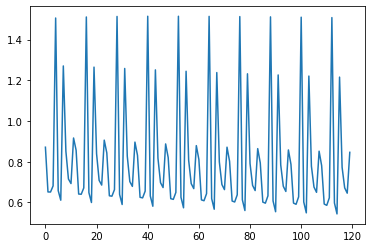

In [182]:
plt.plot(loss_)